# Exercise 1: Linear Algebra (20 points)

One of the challenges in machine learning is moving from the formal linear algebra formulation to a practical implementation with discrete vectors.

Let us look again at the NAND gate implementation with a single perceptron node.
The node has two inputs $x_1$ and $x_2$ and a single output.

The perceptron node implements a transformation between input $\vec{x}$ and output $y$ described by
$$y = f({\bf x}; {\bf w}, b) = {\bf w}^T {\bf x} + b.$$



## Describe the form of the input ${\bf x}$.

Is it a column vector
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$
 or a row vector
$\begin{bmatrix}
x_1
x_2
\end{bmatrix}$
 ? If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Describe the form of the weights ${\bf w}$.

Is it a square array or something else? If it were to be implemented as a PyTorch tensor, what should its dimensions be? Does your answer make sense in the equation above with ${\bf w}^T$?

## Describe the form of the bias $b$.

If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Calculate $y$ with weights and bias

Take $w_1=w_2=-2$ and $b=3$.
Then calculate the perceptron outputs for
- $y = f(x_1=0, x_2=0)$
- $y = f(x_1=0, x_2=1)$
- $y = f(x_1=1, x_2=0)$
- $y = f(x_1=1, x_2=1)$

What final piece is missing in this model, if the goal is produce a truth table with $y$ equal to 0 or 1?
Add the missing piece to your calculation to verify that this model has learned the NAND logic table.

##Answer:
It's a column vector in order to make ${\bf w}^T {\bf x}$ meaningful. In PyTorch, a single input can be stored as a tensor of shape (2,1). In practice, PyTorch often uses a 1-D tensor x=torch.tensor([x1,x2])with shape (2,) which behaves like a column vector when used in dot products with the weight vector

No, the weights is not a square array, it's a column vector that of length 2 with shape (2,1). Yes it make sense as ${\bf w}$'s transpose has shape (1,2) that can make ${\bf w}^T {\bf x}$ a scalar

The bias is a scalar, a real number and a 0 dimension tensor in pyTorch or shape(1,).

The final piece is
|  $ x_1 $  |  $ x_2 $  | NAND |
|--------|--------|------|
| 0      | 0      | 1    |
| 0      | 1      | 1    |
| 1      | 0      | 1    |
| 1      | 1      | 0    |



In [42]:
import torch

# Define weights and bias
w = torch.tensor([-2, -2])  # row vector
b = torch.tensor([3])

# Inputs
inputs = [(0,0), (0,1), (1,0), (1,1)]

for x1, x2 in inputs:
    x = torch.tensor([x1, x2])
    y = torch.dot(w, x) + b  # w^T x + b
    print(f"Input ({x1},{x2}): y = {y.item()}")

Input (0,0): y = 3
Input (0,1): y = 1
Input (1,0): y = 1
Input (1,1): y = -1


# Exercise 2: Linear Regression (40 points)

In this exercise we will use a simple perceptron (one node) to calculate the linear regression for the function $f(x) = y$.

In this exercise each data point has a single $x$ and a single $y$.

Fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [14]:
import torch
from torch.autograd import Variable

x_data_tensor = torch.Tensor([[0.0500],[0.0591],[0.0682],[0.0773],[0.0864],
        [0.0955],[0.1045],[0.1136],[0.1227],[0.1318],
        [0.1409],[0.1500],[0.1591],[0.1682],[0.1773],
        [0.1864],[0.1955],[0.2045],[0.2136],[0.2227],
        [0.2318],[0.2409],[0.2500],[0.2591],[0.2682],
        [0.2773],[0.2864],[0.2955],[0.3045],[0.3136],
        [0.3227],[0.3318],[0.3409],[0.3500],[0.3591],
        [0.3682],[0.3773],[0.3864],[0.3955],[0.4045],
        [0.4136],[0.4227],[0.4318],[0.4409],[0.4500],
        [0.4591],[0.4682],[0.4773],[0.4864],[0.4955],
        [0.5045],[0.5136],[0.5227],[0.5318],[0.5409],
        [0.5500],[0.5591],[0.5682],[0.5773],[0.5864],
        [0.5955],[0.6045],[0.6136],[0.6227],[0.6318],
        [0.6409],[0.6500],[0.6591],[0.6682],[0.6773],
        [0.6864],[0.6955],[0.7045],[0.7136],[0.7227],
        [0.7318],[0.7409],[0.7500],[0.7591],[0.7682],
        [0.7773],[0.7864],[0.7955],[0.8045],[0.8136],
        [0.8227],[0.8318],[0.8409],[0.8500],[0.8591],
        [0.8682],[0.8773],[0.8864],[0.8955],[0.9045],
        [0.9136],[0.9227],[0.9318],[0.9409],[0.9500]])
y_array = [0.2484659, 0.32902399, 0.54115681, 0.3084831,  0.5618252,  0.36455911,
 0.51350721, 0.59238188, 0.50134166, 0.83304367, 0.7044594,  0.86724902,
 0.8560783,  0.97976775, 0.97786013, 0.67360169, 0.94500984, 1.00788982,
 1.12242341, 1.17383408, 1.12468363, 1.13431148, 1.17662245, 1.3324501,
 1.23486871, 1.16412706, 1.36320016, 1.55521281, 1.38178904, 1.49117572,
 1.58999798, 1.7864531,  1.77436729, 1.72934819, 1.66198311, 1.79041017,
 2.20885834, 1.97323221, 2.1730214,  2.01557034, 2.19822747, 2.08018215,
 2.10432378, 2.13234159, 2.0252848,  2.36310875, 2.22574087, 2.21272699,
 2.35988945, 2.30726429, 2.65259961, 2.60177056, 2.82030711, 2.65299176,
 2.63965026, 2.59975554, 2.82430745, 2.81222783, 2.73346561, 2.80687846,
 2.96686021, 3.01237272, 3.12654109, 3.10471933, 3.01646611, 3.22289136,
 3.28936654, 3.05285429, 3.23316291, 3.39834175, 3.42476185, 3.29001894,
 3.43420673, 3.50978013, 3.60845387, 3.75540575, 3.70630173, 3.68288956,
 3.95154621, 3.66087953, 3.9726395,  4.06565774, 4.14370104, 3.86052788,
 4.00409922, 4.08683924, 4.02585529, 4.37126455, 4.19095016, 4.38038983,
 4.32872869, 4.59454492, 4.49190972, 4.4209342,  4.42530996, 4.6364482,
 4.61110624, 4.63337463, 4.73420358, 4.50500814]

# TO-DO: Add code to create the y data tensor here
# It should match the x data tensor in size and shape
y_data_tensor = torch.Tensor(y_array)

In [15]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # TO-DO: replace M,N with numbers
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)
# TO-DO: update the learning rate to a reasonable value

In [16]:
# TO-DO: update to use your data tensors and a reasonable number of epochs
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = our_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 4.787728786468506
epoch 1, loss 4.636439800262451
epoch 2, loss 4.492701053619385
epoch 3, loss 4.356135368347168
epoch 4, loss 4.226383209228516
epoch 5, loss 4.1031060218811035
epoch 6, loss 3.9859800338745117
epoch 7, loss 3.8746981620788574
epoch 8, loss 3.768967628479004
epoch 9, loss 3.6685125827789307
epoch 10, loss 3.5730695724487305
epoch 11, loss 3.482386827468872
epoch 12, loss 3.3962278366088867
epoch 13, loss 3.3143668174743652
epoch 14, loss 3.2365882396698
epoch 15, loss 3.162688970565796
epoch 16, loss 3.092474937438965
epoch 17, loss 3.0257625579833984
epoch 18, loss 2.9623770713806152
epoch 19, loss 2.902151584625244
epoch 20, loss 2.8449289798736572
epoch 21, loss 2.7905590534210205
epoch 22, loss 2.7388992309570312
epoch 23, loss 2.6898140907287598
epoch 24, loss 2.6431760787963867
epoch 25, loss 2.5988616943359375
epoch 26, loss 2.556755781173706
epoch 27, loss 2.5167479515075684
epoch 28, loss 2.4787328243255615
epoch 29, loss 2.4426112174987793
epoc

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

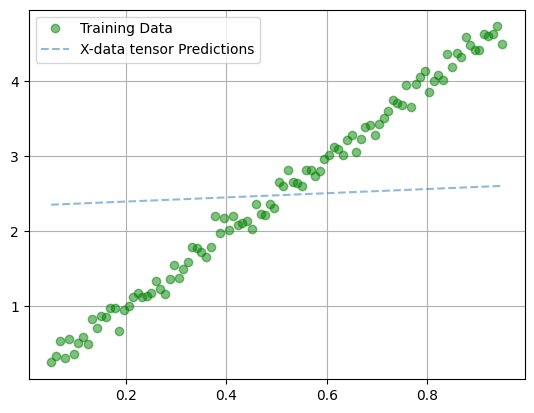

In [21]:
from matplotlib import pyplot as plt, rcParams
predicted = our_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.8$
- $x=1.5$

In [23]:
# TO-DO: write prediction code here, using the model name

# Test on new x values
test_x = torch.Tensor([[-0.2],
                        [ 0.8],
                        [ 1.5]])

test_pred_y = our_model(test_x)

for x_val, y_val in zip(test_x, test_pred_y):
    print(f"x = {x_val.item():.2f}, predicted y = {y_val.item():.4f}")



x = -0.20, predicted y = 2.2851
x = 0.80, predicted y = 2.5642
x = 1.50, predicted y = 2.7595


# Exercise 3: Perceptron (40 points)

In this exercise we will use a multi-layer perceptron to learn a non-linear function $y=f(x)$.

You are given the $x$ and $y$ data, and the task is to produce a machine learning model that can predict $y$ for any given $x$.

As for Exercise 2, fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [37]:
import torch
from torch.autograd import Variable
x_data_tensor = torch.tensor([
    [0.0500], [0.0591], [0.0682], [0.0773], [0.0864],
    [0.0955], [0.1045], [0.1136], [0.1227], [0.1318],
    [0.1409], [0.1500], [0.1591], [0.1682], [0.1773],
    [0.1864], [0.1955], [0.2045], [0.2136], [0.2227],
    [0.2318], [0.2409], [0.2500], [0.2591], [0.2682],
    [0.2773], [0.2864], [0.2955], [0.3045], [0.3136],
    [0.3227], [0.3318], [0.3409], [0.3500], [0.3591],
    [0.3682], [0.3773], [0.3864], [0.3955], [0.4045],
    [0.4136], [0.4227], [0.4318], [0.4409], [0.4500],
    [0.4591], [0.4682], [0.4773], [0.4864], [0.4955],
    [0.5045], [0.5136], [0.5227], [0.5318], [0.5409],
    [0.5500], [0.5591], [0.5682], [0.5773], [0.5864],
    [0.5955], [0.6045], [0.6136], [0.6227], [0.6318],
    [0.6409], [0.6500], [0.6591], [0.6682], [0.6773],
    [0.6864], [0.6955], [0.7045], [0.7136], [0.7227],
    [0.7318], [0.7409], [0.7500], [0.7591], [0.7682],
    [0.7773], [0.7864], [0.7955], [0.8045], [0.8136],
    [0.8227], [0.8318], [0.8409], [0.8500], [0.8591],
    [0.8682], [0.8773], [0.8864], [0.8955], [0.9045],
    [0.9136], [0.9227], [0.9318], [0.9409], [0.9500]
])
y_data_tensor = torch.tensor([
    [ 1.7583], [ 1.7594], [ 1.8341], [ 1.6776], [ 1.6192],
    [ 1.6319], [ 1.2830], [ 1.4240], [ 1.2310], [ 1.1797],
    [ 1.1209], [ 1.0473], [ 0.9846], [ 0.8850], [ 0.5541],
    [ 0.6185], [ 0.3247], [ 0.2793], [ 0.2393], [ 0.1914],
    [-0.1365], [-0.3595], [-0.4752], [-0.5761], [-0.7215],
    [-0.6921], [-0.9243], [-0.8667], [-0.8986], [-1.0227],
    [-1.3271], [-1.2883], [-1.4789], [-1.4397], [-1.5957],
    [-1.6669], [-1.6963], [-1.5355], [-1.8969], [-1.8468],
    [-1.9558], [-2.1036], [-2.0511], [-2.0254], [-2.0736],
    [-2.1414], [-2.1034], [-1.8813], [-1.9003], [-1.8852],
    [-1.7806], [-1.8672], [-1.6624], [-1.7309], [-1.6294],
    [-1.4354], [-1.3698], [-1.3055], [-1.2557], [-1.0780],
    [-1.0991], [-0.9720], [-0.6129], [-0.6491], [-0.5295],
    [-0.3640], [-0.2636], [-0.0167], [ 0.0487], [ 0.0429],
    [ 0.1645], [ 0.2342], [ 0.2722], [ 0.6613], [ 0.6190],
    [ 0.8127], [ 1.0884], [ 1.1002], [ 1.0179], [ 1.3273],
    [ 1.2551], [ 1.3914], [ 1.6677], [ 1.5505], [ 1.6793],
    [ 1.6582], [ 1.7866], [ 1.9044], [ 1.8406], [ 1.9540],
    [ 2.0823], [ 2.0165], [ 1.8276], [ 1.9111], [ 2.0306],
    [ 2.2018], [ 1.9585], [ 1.9884], [ 1.8752], [ 1.8503]
])

Check the model being constructed.
What do you think is the best architecture to learn this dataset?
(You can change your mind later.)

In [38]:
# TO-DO: check architecture. Is this right for the problem?
from torch import nn, optim
complex_model = nn.Sequential(
    nn.Linear(1, 3),
    nn.Sigmoid(),
    #nn.Linear(3, 3),
    #nn.Sigmoid(),
    nn.Linear(3, 1)
)

# TO-DO: update the learning rate
criterion = nn.MSELoss()
optimizer = optim.SGD(complex_model.parameters(), lr=0.01)

In [39]:
# TO-DO: update number of epochs
for epoch in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = complex_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 2.193770408630371
epoch 1, loss 2.178204298019409
epoch 2, loss 2.16377592086792
epoch 3, loss 2.1504018306732178
epoch 4, loss 2.138004779815674
epoch 5, loss 2.1265125274658203
epoch 6, loss 2.1158597469329834
epoch 7, loss 2.1059842109680176
epoch 8, loss 2.0968286991119385
epoch 9, loss 2.088341236114502
epoch 10, loss 2.080472230911255
epoch 11, loss 2.073176860809326
epoch 12, loss 2.066412925720215
epoch 13, loss 2.0601413249969482
epoch 14, loss 2.0543265342712402
epoch 15, loss 2.0489344596862793
epoch 16, loss 2.0439348220825195
epoch 17, loss 2.0392982959747314
epoch 18, loss 2.034999132156372
epoch 19, loss 2.0310115814208984
epoch 20, loss 2.027313470840454
epoch 21, loss 2.0238840579986572
epoch 22, loss 2.020703077316284
epoch 23, loss 2.0177524089813232
epoch 24, loss 2.015015125274658
epoch 25, loss 2.0124759674072266
epoch 26, loss 2.010120153427124
epoch 27, loss 2.007934331893921
epoch 28, loss 2.005905866622925
epoch 29, loss 2.004023551940918
epoch 3

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

yes is make sense

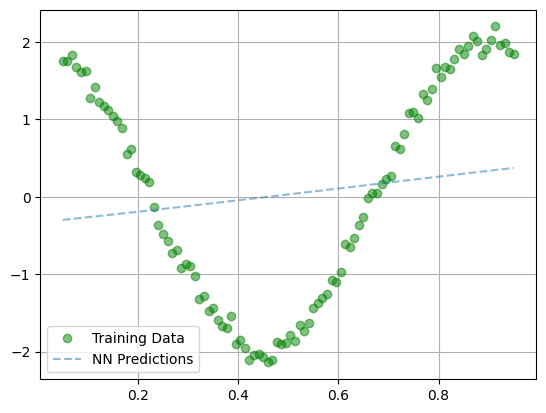

In [40]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = complex_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.4$
- $x=0.8$

In [41]:
# TO-DO: put your prediction code (aka inference code) here

# Test on new x values
test_x = torch.Tensor([[-0.2],
                        [ 0.4],
                        [ 0.8]])

test_pred_y = our_model(test_x)

for x_val, y_val in zip(test_x, test_pred_y):
    print(f"x = {x_val.item():.2f}, predicted y = {y_val.item():.4f}")


x = -0.20, predicted y = 2.2851
x = 0.40, predicted y = 2.4525
x = 0.80, predicted y = 2.5642
